### Colab 환경에서의 자연어 처리 시작하기

#### 1-1 한글 폰트 설정
#### 1-2 한글 적용 확인
#### 1-3 konlpy 설치
#### 1-4 한글 엔진을 이용한 간단한 예제

In [16]:
import matplotlib as mpl             # 기본 설정 만지는 용도
import matplotlib.pyplot as plt      # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np

### colab 환경에서 한글 적용을 위한 나눔 고딕 설치

In [17]:
### 나눔 고딕 설치
!apt-get update -qq   # 설치를 업데이트   -qq  : 로그를 최소한으로
!apt-get install fonts-nanum* -qq # 설치한다. fonts-nanum*   =>  ttf-nanum, ttf-nanum-coding, ttf-nanum-extra ]

NanumGothic Eco


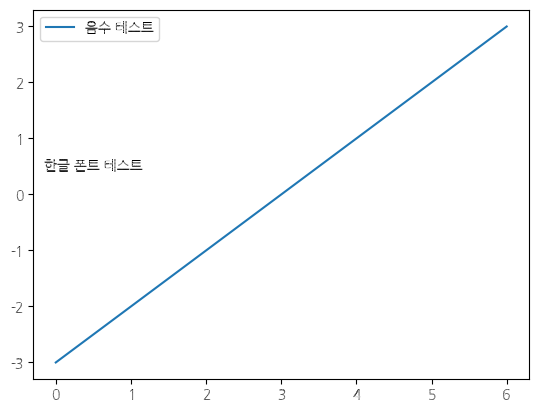

In [18]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 폰트 파일 경로
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

# 폰트 프로퍼티 생성
font_prop = fm.FontProperties(fname=path, size=10)
font_name = font_prop.get_name()
print(font_name)  # NanumGothic Eco

# 폰트 매니저에 폰트 추가
fm.fontManager.addfont(path)

# matplotlib에 폰트 설정
plt.rc('font', family=font_name)

# 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False

# 예제 플롯
plt.figure()
plt.plot([-3, -2, -1, 0, 1, 2, 3], label='음수 테스트')
plt.text(0.5, 0.5, '한글 폰트 테스트', ha='center', va='center', fontproperties=font_prop)
plt.legend()
plt.show()


In [19]:
# 데이터 준비
data = np.random.randint(-200, 100, 50).cumsum()
data

array([  -75,  -213,  -344,  -408,  -321,  -453,  -442,  -448,  -515,
        -629,  -653,  -680,  -773,  -713,  -910, -1089, -1060, -1029,
        -997, -1098, -1237, -1165, -1097, -1125, -1164, -1121, -1067,
       -1062, -1093, -1101, -1101, -1121, -1309, -1500, -1651, -1789,
       -1845, -1901, -2031, -2229, -2230, -2406, -2513, -2557, -2718,
       -2889, -2959, -2942, -3029, -3040])

<ipython-input-20-b59247eb28e3>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


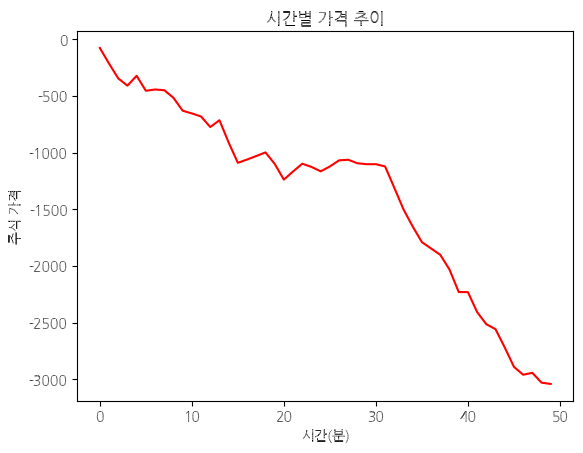

In [20]:
# 그래프를 그려보자. 이번에는 정상
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

### 1-3 konlpy 소개 및 설치
  * 설치 : pip install konlpy
  * 웹 사이트 : https://konlpy.org/ko/latest/
  * KoNLPy는 파이썬 프로그래밍 언어로 사용이 가능

In [26]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 39.6 MB/s eta 0:00:00


In [27]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
import konlpy

#### 꼬꼬마를 이용한 분석
  * 문장 분석
  * 명사 분석
  * 형태소 분석

### 문장 단위 분리
 * [].sentences() : 주어진 텍스트를 문장 단위로 쪼개어 리스트로 반환.

In [29]:
from konlpy.tag import Kkma

# Kkma 객체 생성
k = Kkma()

# 문장 분리
sentences = k.sentences("안녕하세요! 오늘은 한글 분석을 시작합니다.")

# 결과 출력
print(sentences)


['안녕하세요!', '오늘은 한글 분석을 시작합니다.']


### 명사 추출
 * [].nouns(텍스트) : 주어진 텍스트에서 명사를 추출해서 리스트로 반환

In [31]:
# 명사 추출
nouns = k.nouns("안녕하세요! 오늘은 한글 분석을 시작합니다.")

# 결과 출력
print(nouns)

['안녕', '오늘', '한글', '분석']


### 형태소 분석
 * http://kkma.snu.ac.kr/documents/index.jsp?doc=postag : 한글 형태소 분석기 품사 태그표
 * (예) NNG : 일반 명사, XSV : 동사 파생 접미사, EFN : 평서형 종결 어미
 * 형태소를 추출한 후, 각 형태소의 품사 태그 반환

In [ ]:
from konlpy.tag import Kkma

# Kkma 객체 생성
k = Kkma()

# 형태소 분석
pos_result = k.pos("안녕하세요! 오늘은 한글 분석을 시작합니다.")

# 결과 출력
print(pos_result)


### 여러가지 엔진 사용해 보기
 * Hannanum
 * Okt(Open Korean Text) (예전 - Twitter)
 * Kkma
 * Mecab
 * Komoran

In [33]:
from konlpy.tag import Hannanum, Okt, Kkma, Komoran

# 형태소 분석 엔진 객체 생성
hannanum = Hannanum()
okt = Okt()
kkma = Kkma()
komoran = Komoran()

# 분석할 텍스트
text = "안녕하세요! 오늘은 한글 분석을 시작합니다."

# Hannanum
hannanum_result = hannanum.pos(text)
print("Hannanum:", hannanum_result)

# Okt (Open Korean Text)
okt_result = okt.pos(text)
print("Okt:", okt_result)

# Kkma
kkma_result = kkma.pos(text)
print("Kkma:", kkma_result)

# Komoran
komoran_result = komoran.pos(text)
print("Komoran:", komoran_result)

# Mecab (주석 처리된 부분은 시스템에 따라 설치 후 사용)
# from konlpy.tag import Mecab
# mecab = Mecab()
# mecab_result = mecab.pos(text)
# print("Mecab:", mecab_result)


Hannanum: [('안녕', 'N'), ('하', 'X'), ('세', 'E'), ('요', 'J'), ('!', 'S'), ('오늘', 'N'), ('은', 'J'), ('한글', 'N'), ('분석', 'N'), ('을', 'J'), ('시작', 'N'), ('하', 'X'), ('ㅂ니다', 'E'), ('.', 'S')]
Okt: [('안녕하세요', 'Adjective'), ('!', 'Punctuation'), ('오늘', 'Noun'), ('은', 'Josa'), ('한글', 'Noun'), ('분석', 'Noun'), ('을', 'Josa'), ('시작', 'Noun'), ('합니다', 'Verb'), ('.', 'Punctuation')]
Kkma: [('안녕', 'NNG'), ('하', 'XSV'), ('세요', 'EFN'), ('!', 'SF'), ('오늘', 'NNG'), ('은', 'JX'), ('한글', 'NNG'), ('분석', 'NNG'), ('을', 'JKO'), ('시작하', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]
Komoran: [('안녕하세요', 'NNP'), ('!', 'SF'), ('오늘', 'NNG'), ('은', 'JX'), ('한글', 'NNP'), ('분석', 'NNG'), ('을', 'JKO'), ('시작', 'NNG'), ('하', 'XSV'), ('ㅂ니다', 'EF'), ('.', 'SF')]


### 설치 및 사용
 - Hannanum, Okt, Kkma, Komoran: pip install konlpy 명령으로 설치 가능합니다.
 - Mecab: 시스템에 따라 추가 설치가 필요.

### 한국 헌법 말뭉치(Korean Law Corpus) 텍스트 데이터 분석

In [35]:
from konlpy.corpus import kolaw
from konlpy.tag import Hannanum, Okt, Kkma, Komoran
# from konlpy.tag import Mecab  # Mecab 사용 시 주석 해제

# 한국 법률 말뭉치에서 헌법 텍스트 파일 열기
c = kolaw.open('constitution.txt').read()
print( c[:15])

대한민국헌법

유구한 역사와


### 라이브러리 불러오기

In [36]:
# 분석할 텍스트의 일부
text_sample = c[:1000]

# 형태소 분석 엔진 객체 생성
hannanum = Hannanum()
okt = Okt()
kkma = Kkma()
komoran = Komoran()
# mecab = Mecab()  # Mecab 사용 시 주석 해제

In [37]:
# 형태소 분석 및 품사 태깅
hannanum_pos = hannanum.pos(text_sample)
okt_pos = okt.pos(text_sample)
kkma_pos = kkma.pos(text_sample)
komoran_pos = komoran.pos(text_sample)
# mecab_pos = mecab.pos(text_sample)  # Mecab 사용 시 주석 해제

In [38]:
# 결과 출력
print("Hannanum POS:\n", hannanum_pos[:10])
print("Okt POS:\n", okt_pos[:10])
print("Kkma POS:\n", kkma_pos[:10])
print("Komoran POS:\n", komoran_pos[:10])
# print("Mecab POS:\n", mecab_pos[:10])  # Mecab 사용 시 주석 해제

Hannanum POS:
 [('대한민국헌법', 'N'), ('유구', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('역사', 'N'), ('와', 'J'), ('전통', 'N'), ('에', 'J'), ('빛', 'N'), ('나는', 'J')]
Okt POS:
 [('대한민국', 'Noun'), ('헌법', 'Noun'), ('\n\n', 'Foreign'), ('유구', 'Noun'), ('한', 'Josa'), ('역사', 'Noun'), ('와', 'Josa'), ('전통', 'Noun'), ('에', 'Josa'), ('빛나는', 'Verb')]
Kkma POS:
 [('대한민국', 'NNG'), ('헌법', 'NNG'), ('유구', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('역사', 'NNG'), ('와', 'JC'), ('전통', 'NNG'), ('에', 'JKM'), ('빛나', 'VV')]
Komoran POS:
 [('대한민국', 'NNP'), ('헌법', 'NNP'), ('유구', 'XR'), ('하', 'XSA'), ('ㄴ', 'ETM'), ('역사', 'NNG'), ('와', 'JC'), ('전통', 'NNG'), ('에', 'JKB'), ('빛나', 'VV')]


In [39]:
# 명사 추출
hannanum_nouns = hannanum.nouns(text_sample)
okt_nouns = okt.nouns(text_sample)
kkma_nouns = kkma.nouns(text_sample)
komoran_nouns = komoran.nouns(text_sample)
# mecab_nouns = mecab.nouns(text_sample)  # Mecab 사용 시 주석 해제

print("\nHannanum Nouns:\n", hannanum_nouns[:10])
print("Okt Nouns:\n", okt_nouns[:10])
print("Kkma Nouns:\n", kkma_nouns[:10])
print("Komoran Nouns:\n", komoran_nouns[:10])
# print("Mecab Nouns:\n", mecab_nouns[:10])  # Mecab 사용 시 주석 해제


Hannanum Nouns:
 ['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동', '건립', '대한민국임시정부']
Okt Nouns:
 ['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']
Kkma Nouns:
 ['대한', '대한민국', '대한민국헌법', '민국', '헌법', '유구', '역사', '전통', '우리', '국민']
Komoran Nouns:
 ['대한민국', '헌법', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시', '정부']


### 각 엔진 성능 분석

In [1]:
from konlpy.corpus import kolaw
c = kolaw.open('constitution.txt').read()
print( c[:15])

대한민국헌법

유구한 역사와


In [2]:
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
import time

In [3]:
start = time.time()
okt = Okt()
print( len( okt.nouns(c) ) )
print("time :", time.time() - start)  # 현재 - 시작 = 실행 시간

3882
time : 22.240808725357056


In [4]:
start = time.time()
komoran = Komoran()
print( len( komoran.nouns(c) ) )
print("time :", time.time() - start)  # 현재 - 시작 = 실행 시간

3358
time : 13.185760974884033


In [5]:
start = time.time()
kkma = Kkma()
print( len( kkma.nouns(c) ) )
print("time :", time.time() - start)  # 현재 - 시작 = 실행 시간

1571
time : 46.30729126930237


In [6]:
han = Hannanum()
start = time.time()
print( len( han.nouns(c) ) )
print("time :", time.time() - start)  # 현재 - 시작 = 실행 시간

3178
time : 9.204519271850586


### 여러 엔진 비교 분석 (대한 민국 헌법 텍스트)
 * 런타임 재기동 후
  * 명사 추출
    * 시간은 Hannanum()-코모란이 가장 빨랐다.
    * 정확도를 떠나 주어진 텍스트에서 Okt가 가장 많은 단어 추출
    * 시간은 Kkma()가 가장 오래 걸리고, 단어 추출도 가장 작다.
    * 속도 Hannanum > Komoran > Okt > Kkma

### 실습1 - 아래 텍스트에 대해서도 비교 분석을 해보기.
```
from konlpy.corpus import kobill
d = kobill.open('1809890.txt').read()
```

### Ref
 * KoNLPy: 파이썬 한국어 NLP
   * https://konlpy.org/en/latest/
   * 최근 업데이트: KoNLPy 0.6.0 (2023년 4월 기준)
   * 주요 변경사항:
       * Python 3.7 이상 지원
       * 새로운 형태소 분석기 'PKMA' 추가
       * 'JPype1' 대신 'JPype2' 사용 (자바 통합 개선)

* konlpy를 사용한 사용 예시
  * https://konlpy.org/ko/latest/examples/
  *

  * 새로운 예시:
    * PKMA 형태소 분석기 사용법
    * 대규모 텍스트 데이터 처리 성능 개선 방법

* 사전 : https://konlpy.org/ko/latest/data/
  * KorQuAD 2.1 (한국어 QA 데이터셋, https://korquad.github.io/)

* mecab 설치
  * https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/
  * 주의: 이 링크는 v0.4.3 기준이며, 최신 버전 (0.6.0)에서는 설치 방법이 다소 변경.
